In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-detection-using-yolo11/yolo11n.pt
/kaggle/input/emotion-detection-using-yolo11/yolo11m.pt
/kaggle/input/emotion-detection-using-yolo11/__results__.html
/kaggle/input/emotion-detection-using-yolo11/__notebook__.ipynb
/kaggle/input/emotion-detection-using-yolo11/__output__.json
/kaggle/input/emotion-detection-using-yolo11/custom.css
/kaggle/input/emotion-detection-using-yolo11/runs/detect/emotion-detection/PR_curve.png
/kaggle/input/emotion-detection-using-yolo11/runs/detect/emotion-detection/P_curve.png
/kaggle/input/emotion-detection-using-yolo11/runs/detect/emotion-detection/val_batch0_pred.jpg
/kaggle/input/emotion-detection-using-yolo11/runs/detect/emotion-detection/F1_curve.png
/kaggle/input/emotion-detection-using-yolo11/runs/detect/emotion-detection/confusion_matrix.png
/kaggle/input/emotion-detection-using-yolo11/runs/detect/emotion-detection/train_batch32072.jpg
/kaggle/input/emotion-detection-using-yolo11/runs/detect/emotion-detection/train_batch32071.jpg

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 27.1 MB/s eta 0:00:00


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import cv2
from ultralytics import YOLO
import torch
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
import cv2
import numpy as np
from PIL import Image
from ultralytics import YOLO

class YOLOTester:
    def __init__(self, mode='predict', model='', source='', device=None, exist_ok=True):
        self.mode = mode
        self.model_path = model
        self.source = source
        self.device = device
        self.exist_ok = exist_ok
        self.model = self.load_model()

    def load_model(self):
        # Load the YOLO model
        model = YOLO(self.model_path)
        return model

    def make_prediction(self, img_input):
        # Handle both image file paths and numpy arrays (e.g., frames from a video)
        if isinstance(img_input, str):  # If it's a file path
            img = Image.open(img_input)
        elif isinstance(img_input, np.ndarray):  # If it's a numpy array (from cv2)
            img = Image.fromarray(cv2.cvtColor(img_input, cv2.COLOR_BGR2RGB))  # Convert to PIL format
        else:
            raise ValueError("Unsupported image input format")

        # Run model prediction
        results = self.model.predict(source=img, save=False)
        return results

    def make_video_prediction(self, label_colors, input_video_path, output_path="output_video.mp4"):
        # Capture from the video file instead of webcam
        cap = cv2.VideoCapture(input_video_path)
        
        # Set up video writer
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break  # End of video stream
            
            # Get predictions for the current frame
            results = self.make_prediction(frame)

            # Draw boxes and labels
            for result in results:
                for box in result.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
                    class_id = int(box.cls[0].item())
                    label = result.names[class_id]
                    color = label_colors.get(label, (255, 255, 255))

                    # Draw bounding box and label on the frame
                    cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
                    cv2.putText(frame, label, (x1+10, y1+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

            # Write the processed frame to the output video
            out.write(frame)

        # Release resources
        cap.release()
        out.release()




0: 640x640 1 Contempt, 1 Sad, 1135.1ms
Speed: 26.1ms preprocess, 1135.1ms inference, 20.5ms postprocess per image at shape (1, 3, 640, 640)
Detected label: Contempt
Detected label: Sad

0: 640x640 1 Neutral, 921.2ms
Speed: 3.2ms preprocess, 921.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Detected label: Neutral

0: 640x640 1 Surprise, 908.0ms
Speed: 3.1ms preprocess, 908.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detected label: Surprise

0: 640x640 1 Contempt, 913.3ms
Speed: 3.1ms preprocess, 913.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Detected label: Contempt

0: 640x640 1 Surprise, 916.9ms
Speed: 2.9ms preprocess, 916.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Detected label: Surprise

0: 640x640 1 Surprise, 915.1ms
Speed: 2.6ms preprocess, 915.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detected label: Surprise

0: 640x640 1 Anger, 907.1ms
Speed: 2.5ms

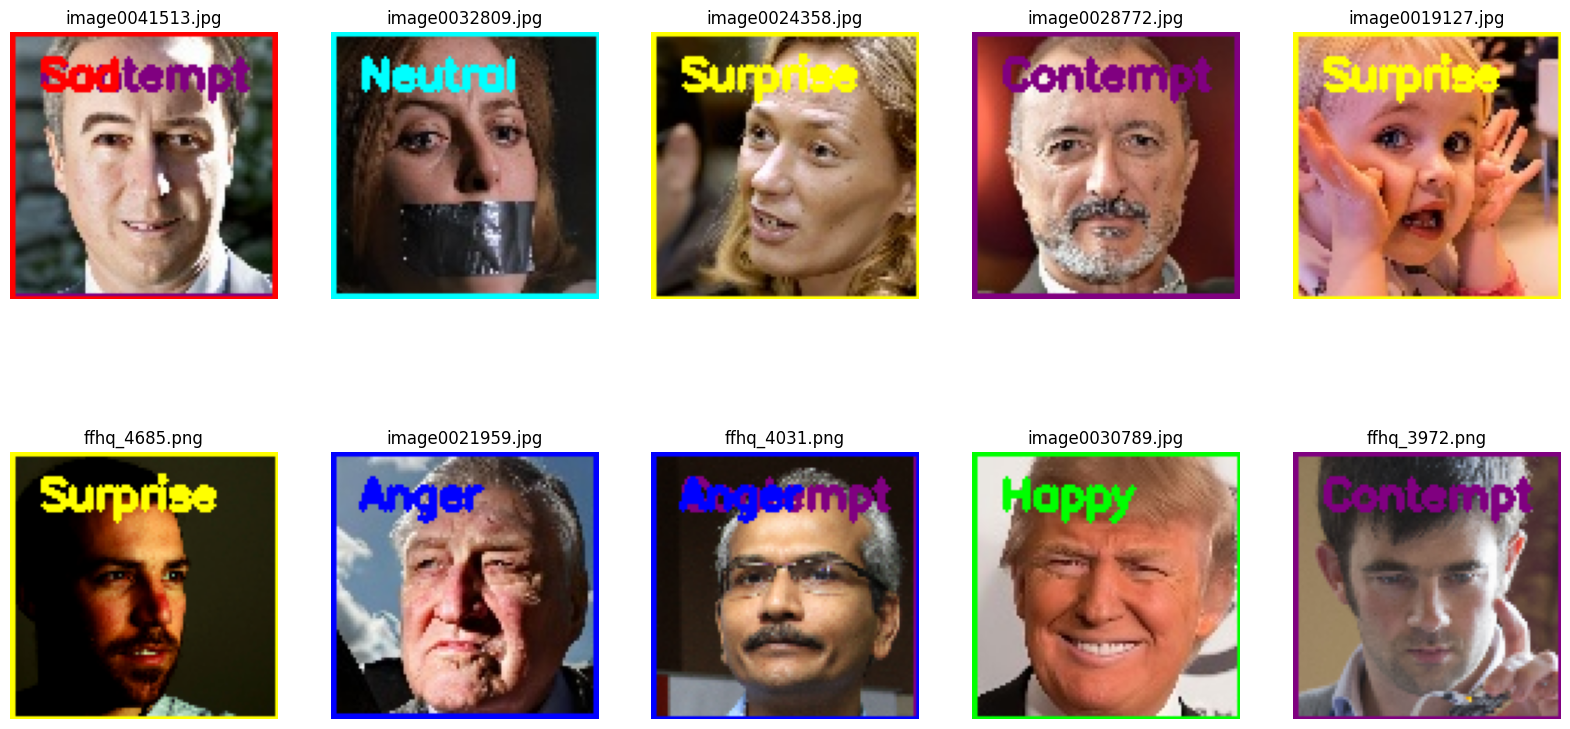

In [5]:
# Initialize necessary paths and setup
test_data_dir = '/kaggle/input/affectnet-yolo-format/YOLO_format/test/images'
output_dir = '/kaggle/working/annotated_images'  # Define output directory
os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist

model_path = '/kaggle/input/emotion-detection-using-yolo11/runs/detect/emotion-detection/weights/best.pt'
tester = YOLOTester(mode='predict', model=model_path, device=0, exist_ok=True)

# Define label colors
label_colors = {
    'Happy': (0, 255, 0),      # Green
    'Sad': (0, 0, 255),        # Blue
    'Anger': (255, 0, 0),      # Red
    'Neutral': (255, 255, 0),  # Yellow
    'Contempt': (128, 0, 128), # Purple
    'Fear': (255, 165, 0),     # Orange
    'Surprise': (0, 255, 255), # Cyan
    'Disgust': (0, 128, 0)     # Dark Green
}

# Loop over the first 10 images in the directory
output_images = []
for img_name in os.listdir(test_data_dir)[:10]:
    img_path = os.path.join(test_data_dir, img_name)
    if img_path.endswith(('.png', '.jpg', '.jpeg')):
        # Get the prediction results for the image
        results = tester.make_prediction(img_path)
        img = cv2.imread(img_path)

        # Check if there are detections
        if len(results[0].boxes) > 0:
            for result in results:
                for box in result.boxes:  # Get each bounding box
                    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Coordinates
                    class_id = int(box.cls[0].item())  # Class ID
                    
                    # Get the label using the class ID
                    label = result.names[class_id]
                    
                    # Choose a color for the label
                    color = label_colors.get(label, (255, 255, 255))  # Default to white if unknown label
                    print(f"Detected label: {label}")

                    # Draw the rectangle around the detected area
                    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

                    # Add the label above the rectangle
                    cv2.putText(img, str(label), (x1+10, y1 + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # Save the annotated image
        output_img_path = os.path.join(output_dir, img_name)
        cv2.imwrite(output_img_path, img)  # Save the image with annotations
        output_images.append((img_name, img))

# Visualization of results with matplotlib (optional)
plt.figure(figsize=(20, 10))
for i, (img_name, img) in enumerate(output_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(img_name)

plt.show()

In [6]:
# Run video file detection
input_video_path = '/kaggle/input/3min-video-test/emotions.mp4'
#tester.make_video_prediction(label_colors, input_video_path=input_video_path, output_path="output_video.mp4")
